In [7]:
# Enhanced Iris Classification Model

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Explore and understand the dataset
print(iris_df.head())

print(iris_df.info())

print(iris_df.describe())

print(iris_df['target'].value_counts())

# Preprocess the data
X = iris_df.drop('target', axis=1)

y = iris_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling: Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a machine learning model using TensorFlow and scikit-learn
model = Sequential([
    Dense(16, input_shape=(4,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, verbose=0, validation_split=0.1)

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{conf_matrix}')


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float

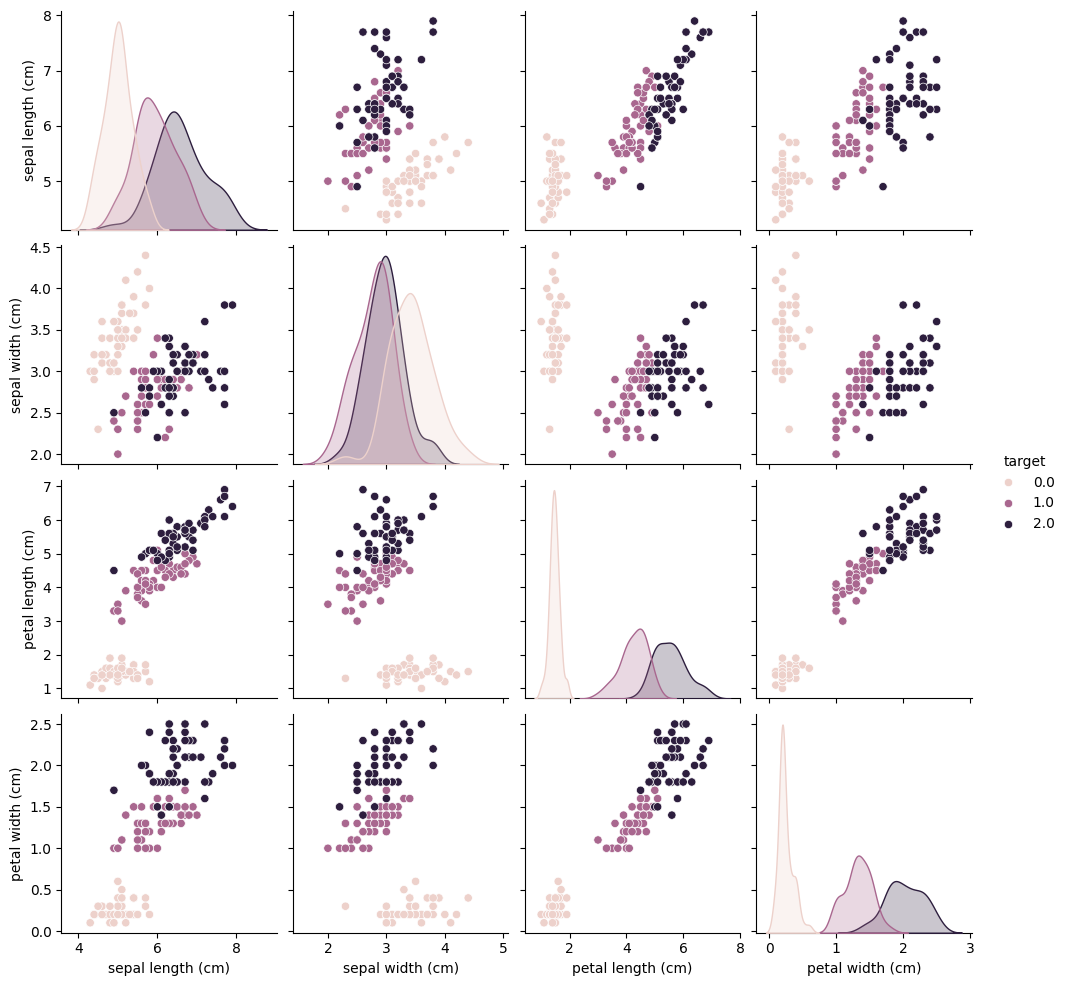

In [8]:

sns.pairplot(iris_df, hue='target')
plt.show()


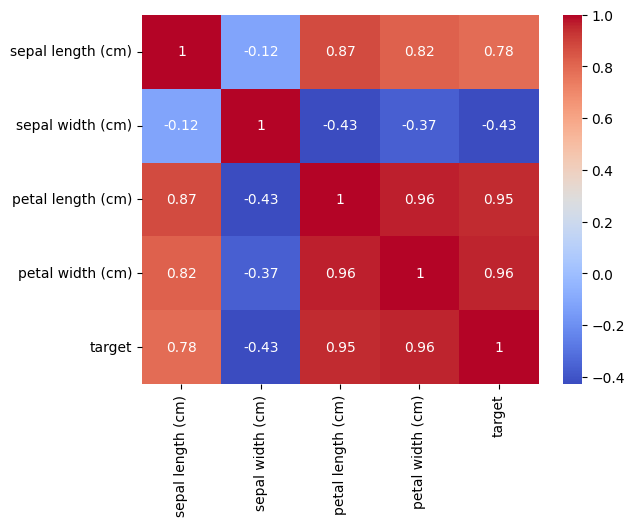

In [9]:
# Visualize correlation matrix
correlation_matrix = iris_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

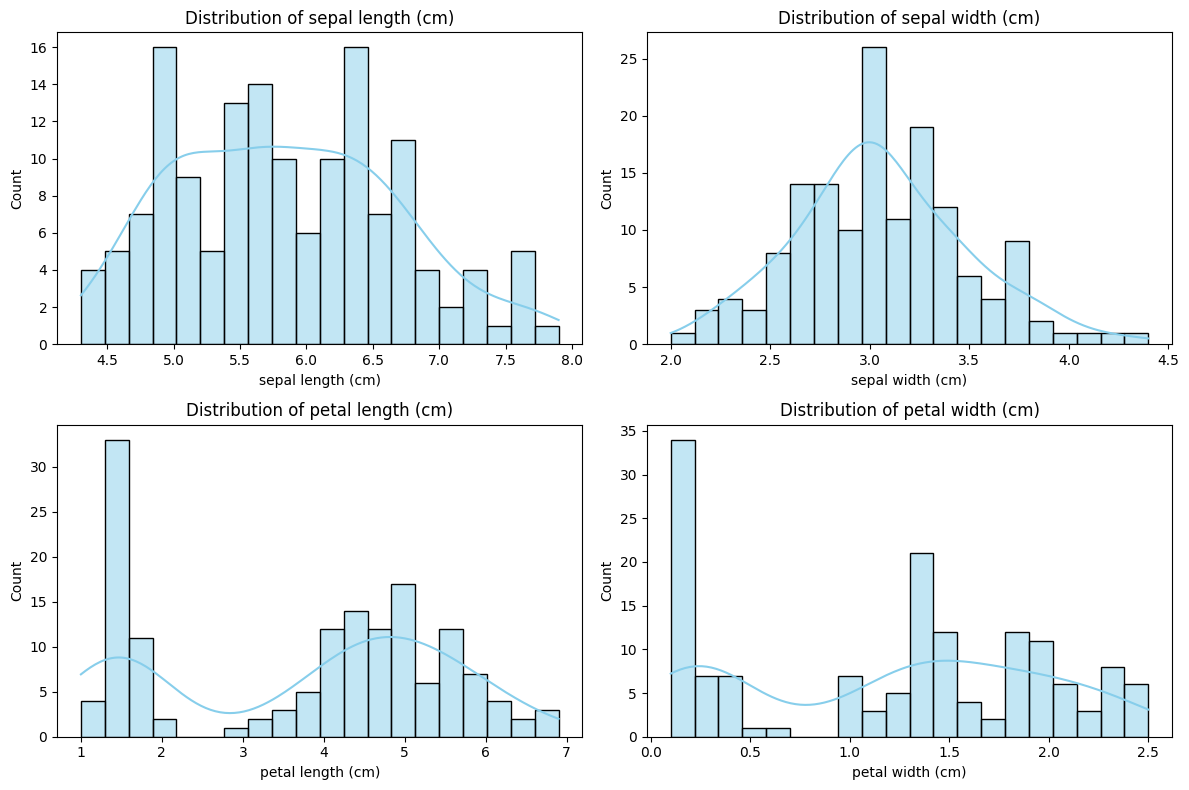

In [10]:
# Additional Visualization for Feature Distributions
# Univariate Distribution for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(iris['feature_names']):
    sns.histplot(iris_df[feature], kde=True, ax=axes[i//2, i%2], color='skyblue', bins=20)
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()




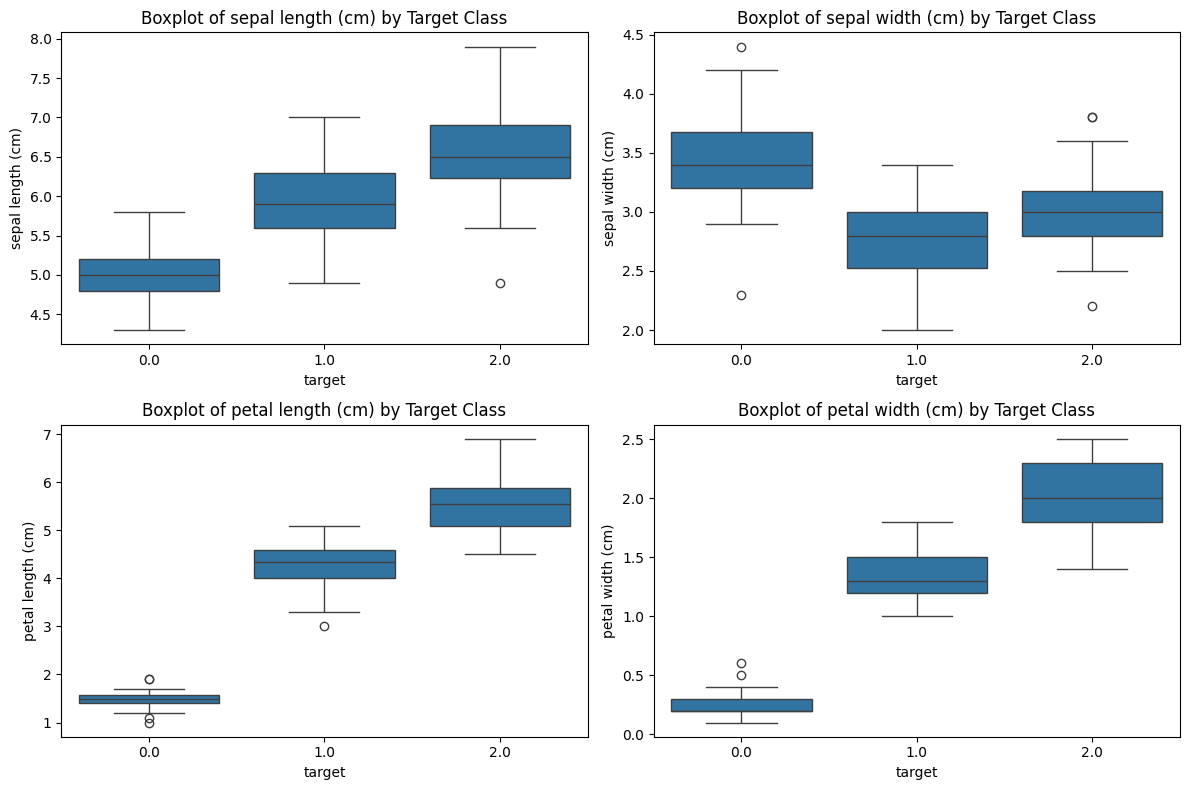

In [11]:

# Box plots for each feature by target class
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, feature in enumerate(iris['feature_names']):
    sns.boxplot(x='target', y=feature, data=iris_df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot of {feature} by Target Class')

plt.tight_layout()
plt.show()

In [12]:
# Additional Evaluation Metric: Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.89      0.94         9
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



1/1 [==============================] - 0s 29ms/step
Predicted Flower Class: Virginica


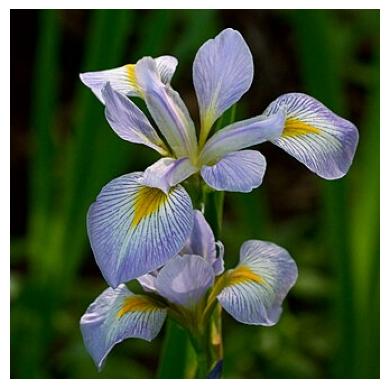

Class Name: Virginica


In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code)

# Step 10: Make predictions for user input and display an image
def predict_flower_class(features):
    features = np.array(features).reshape(1, -1)
    prediction = np.argmax(model.predict(features), axis=-1)[0]
    return prediction

def display_flower_info(prediction):
    # Class names and corresponding images
    class_info = {
        0: {'name': 'Setosa', 'image': 'setosa.jpg'},
        1: {'name': 'Versicolor', 'image': 'versicolor.jpg'},
        2: {'name': 'Virginica', 'image': 'virginica.jpg'}
    }

    # Display information
    predicted_class_name = class_info[prediction]['name']
    print(f"Predicted Flower Class: {predicted_class_name}")

    # Display image
    image_path = class_info[prediction]['image']
    img = Image.open(image_path)

    # Plot and show the image within the console
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Return class name and image path
    return predicted_class_name, image_path

# Example user input (modify as needed)
user_input = [9.1, 7.5, 1.4, 0.2]

# Make predictions and display information
predicted_class_name, image_path = display_flower_info(predict_flower_class(user_input))

# Output the information
print(f"Class Name: {predicted_class_name}")

